In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from math import exp, pow, log
import pylab
from scipy.interpolate import interp1d
%matplotlib inline

#Постоянные и коэффициенты перевода
aem = 1.66054e-27
evToT = 11604.52500617
h = 6.626e-34
pi = 3.1415926535
e = 1.6021766e-19
k = 1.380648e-23
m = 9.1e-31
h_ = h / (2 * pi)

In [63]:
#Параметры задачи
q0 = [1e6, 1e7 ,1e8 , 1e9]
r = 0.1
mu = 1e5
L = 5.4e6
U = 0.75 * L
lmbd = 390
ro = 8.9e3
c = 360
cs = 3710
hi = lmbd / (ro * c)

eps = 1e-21
xstart = 0
xend = 100
xstep = 1e-02


In [64]:
#итерируемся для получения скорости и температуры фронта
curr_vf = (1 - r) * q0[0] / (ro * L)
prev_vf = 0
curr_Tf = U / log(cs / curr_vf)
prev_Tf = 0

while(abs(curr_vf - prev_vf) > eps):
    prev_vf = curr_vf
    prev_Tf = curr_Tf
    curr_vf = (1 - r) * q0[0] / (ro *(L + c * curr_Tf))
    curr_Tf = U / log(cs / curr_vf)
    print((curr_vf - prev_vf))
print("Vf:", curr_vf)
print("Tf:", curr_Tf)


-1.7489116713933543e-05
1.6282462835180532e-07
-7.342393659041671e-09
3.1239689337040436e-10
-1.3324829313705121e-11
5.682903823189106e-13
-2.4237115525698903e-14
1.0336927508077833e-15
-4.4086370838691824e-17
1.8806249011413603e-18
-8.046812998915853e-20
3.3881317890172014e-21
0.0
Vf: 1.39325689816758e-06
Tf: 186613.12445244973


In [78]:
x_graph = np.arange(xstart, xend + xstep, xstep)
T_graph = [] #np.zeros(x_graph.shape)
def T(x, Tf, vf):
    return (Tf + (1 - r) * q0[0] / (ro * c * (vf - mu * hi))) * exp(-vf * x / hi) +\
           (1 - r) * q0[0] / (ro * c * (vf - mu * hi)) * exp(-mu * x)

for x in x_graph:
    T_graph.append(T(x, curr_Tf, curr_vf))

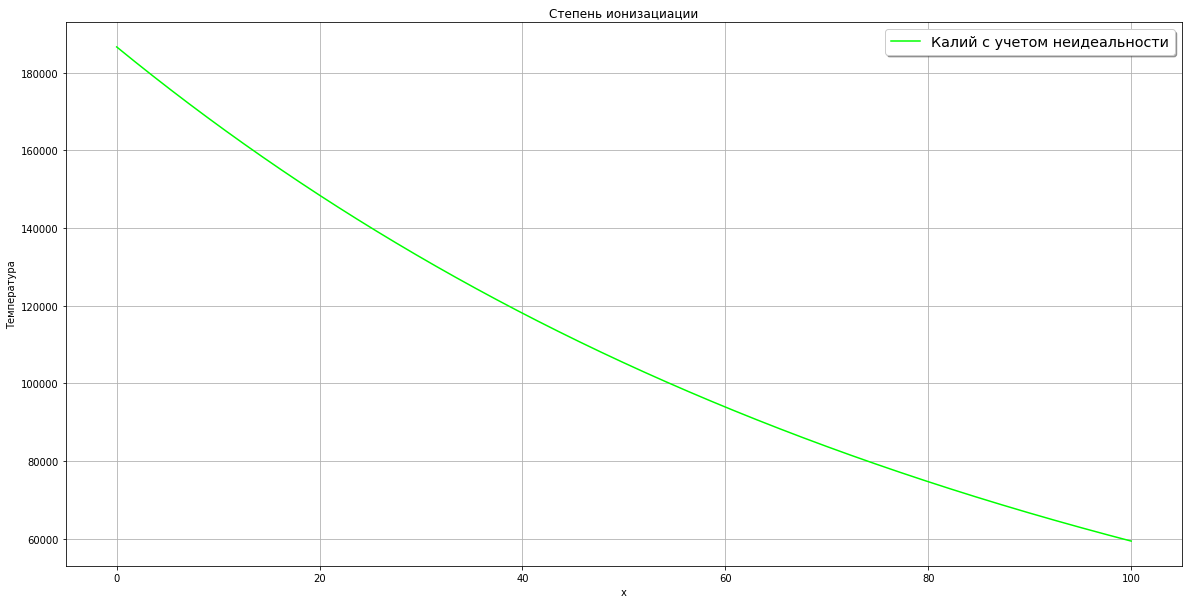

In [79]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x_graph, T_graph, 'lime', label='Калий с учетом неидеальности')

ax.set_title(u'Степень ионизациации')

ax.yaxis.set_label_position('left')
ax.set_ylabel(u'Температура')

ax.xaxis.set_label_position('bottom')
ax.set_xlabel(u'x')
legend = ax.legend(loc='best', shadow=True, fontsize='x-large')

legend.get_frame().set_facecolor('white')
ax.grid(True)
plt.show()